In [ ]:
# Load data & initial setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from datasets import load_dataset

c:\Users\Gumiuk\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

In [4]:
eu_list = [
    "Albania", "Andorra", "Austria", "Belgium", "Belarus",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Montenegro",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France",
    "Greece", "Spain", "Netherlands", "Ireland", "Iceland", "Kosovo",
    "Liechtenstein", "Lithuania", "Luxembourg", "Latvia",
    "North Macedonia", "Malta", "Moldova", "Monaco", "Germany",
    "Norway", "Poland", "Portugal", "Romania", "Russia",
    "San Marino", "Serbia", "Slovakia", "Slovenia", "Switzerland",
    "Sweden", "Turkey", "Ukraine", "Vatican City", "Hungary",
    "United Kingdom", "Italy"
]

# Convert job posted date column to datetime
df_eu = df.copy()
df_eu['job_posted_date'] = pd.to_datetime(df_eu['job_posted_date'])

# Convert skills column from string to list
df_eu['job_skills'] = df_eu['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# # Filter by EU country and drop NA
df_eu = df_eu[df_eu['job_location'].isin(eu_list)].dropna(subset='salary_year_avg')
df_eu

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1449,Machine Learning Engineer,Senior NLP/ML Engineer,Hungary,via Ai-Jobs.net,Full-time,False,Hungary,2023-01-27 14:16:10,False,False,Hungary,year,185500.0,NaN,Exadel,"[python, sql, aws, redshift, hugging face, pan...","{'cloud': ['aws', 'redshift'], 'libraries': ['..."
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,"[gdpr, sap, powerpoint, excel]","{'analyst_tools': ['sap', 'powerpoint', 'excel..."
2125,Business Analyst,Business Analyst to support Channel Engagement...,Sweden,via Ai-Jobs.net,Full-time,False,Sweden,2023-12-29 13:16:44,False,False,Sweden,year,43200.0,NaN,Nordea,[qlik],{'analyst_tools': ['qlik']}
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,51014.0,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
2984,Senior Data Engineer,Senior Data Scientist Engineer,Bulgaria,via Ai-Jobs.net,Full-time,False,Bulgaria,2023-12-09 13:17:16,False,False,Bulgaria,year,170500.0,NaN,SAP,"[python, aws, azure, jupyter, numpy, pandas, k...","{'analyst_tools': ['sap'], 'cloud': ['aws', 'a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773010,Cloud Engineer,Head of Data Platform and Cloud,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-11-10 01:16:51,True,False,Poland,year,221000.0,NaN,Palta,"[aws, azure, snowflake, databricks, gdpr, looker]","{'analyst_tools': ['looker'], 'cloud': ['aws',..."
773623,Senior Data Engineer,Senior Data Engineer,Bulgaria,via Ai-Jobs.net,Full-time,False,Bulgaria,2023-10-07 01:33:21,True,False,Bulgaria,year,155500.0,NaN,Exadel,"[python, scala, java, openstack, spark, docker...","{'cloud': ['openstack'], 'libraries': ['spark'..."
774491,Data Analyst,Data Analyst | FintechOps,Portugal,via Ai-Jobs.net,Full-time,False,Portugal,2023-10-20 02:04:13,True,False,Portugal,year,118190.0,NaN,Farfetch,"[python, sql, sql server, bigquery, looker, ta...","{'analyst_tools': ['looker', 'tableau'], 'clou..."
775833,Software Engineer,"Senior Staff Software Engineer (Java, Rust) - ...",Slovakia,via Ai-Jobs.net,Full-time,False,Slovakia,2023-02-21 02:06:01,True,False,Slovakia,year,89100.0,NaN,SentinelOne,"[java, go, python, scala, rust, aws, gcp, kafk...","{'analyst_tools': ['splunk'], 'cloud': ['aws',..."


In [ ]:

# Create list of 3 data job positions
titles = df_eu['job_title_short'].value_counts().sort_values(ascending=False).index[:3].to_list()

# filter Dataframe by 3 Data job positions
df_eu_top = df_eu[df_eu['job_title_short'].isin(titles)]

# Create sorted list of Data jobs
titles_order = df_eu_top.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index




Index(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype='object', name='job_title_short')

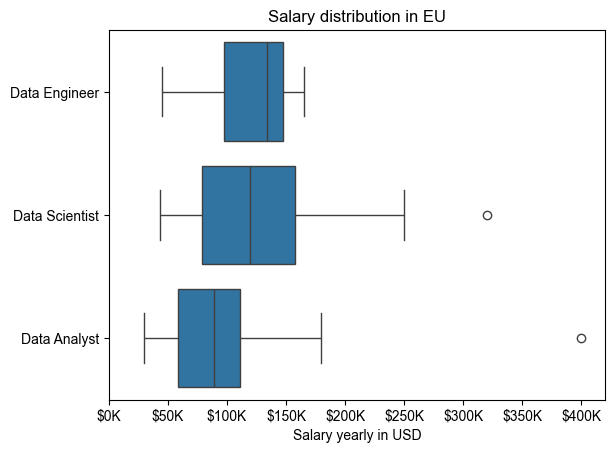

In [ ]:
# Create boxplot of EU salary distribution
sns.boxplot(data=df_eu_top,x='salary_year_avg',y='job_title_short',order=titles_order)
sns.set_theme(style="ticks")

# Add chart title, edit labels, xlim,
plt.title('Salary distribution in EU')
plt.ylabel('')
plt.xlabel('Salary yearly in USD')

# Limit x-axis range to focus on relevant salary values
plt.xlim(0,420000)

# Format x-axis ticks as "$XXK" for readability
ticks = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks)

plt.show()



In [ ]:
# Create EU Data Analyst subset
df_da_eu = df.copy()

df_da_eu = df_da_eu[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(eu_list))]

# Convert skill strings into Python lists
df_da_eu['job_skills'] = df_da_eu['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Remove rows without salary and expand skill list into separate rows
df_da_eu = df_da_eu.dropna(subset='salary_year_avg')
df_da_eu = df_da_eu.explode('job_skills')
df_da_eu

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,gdpr,"{'analyst_tools': ['sap', 'powerpoint', 'excel..."
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,sap,"{'analyst_tools': ['sap', 'powerpoint', 'excel..."
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,powerpoint,"{'analyst_tools': ['sap', 'powerpoint', 'excel..."
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,excel,"{'analyst_tools': ['sap', 'powerpoint', 'excel..."
1555,Data Analyst,Data Analyst/Engineer (M/F/D),"Aveiro, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-04-25 13:27:25,False,False,Portugal,year,111175.0,NaN,Bosch Group,databricks,"{'cloud': ['databricks'], 'libraries': ['spark']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783448,Data Analyst,Data Analyst / Business Intelligence Specialist,"Katowice, Poland",via Ai-Jobs.net,Full-time,False,Poland,2023-06-30 07:03:28,True,False,Poland,year,57500.0,NaN,SGS,power bi,"{'analyst_tools': ['power bi'], 'programming':..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,sql,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,python,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,r,"{'analyst_tools': ['looker'], 'programming': [..."


In [ ]:
# Top-paying skills (median salary) for Data Analysts
df_da_top_pay = df_da_eu.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='median',ascending=False).head(10)
df_da_top_pay


,median,count
job_skills,,
svn,400000.0,1
pytorch,177283.0,1
tensorflow,177283.0,1
mongo,165000.0,1
aurora,165000.0,1
mongodb,165000.0,2
terraform,163782.0,3
nosql,163782.0,13
smartsheet,155000.0,1


In [ ]:
# Most-common (demanded) skills and sorted by median pay
df_da_top_skill = df_da_eu.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='count',ascending=False)
df_da_top_skill = df_da_top_skill.head(10).sort_values(by='median',ascending=False)
df_da_top_skill

,median,count
job_skills,,
looker,111175.0,44
spark,105000.0,41
azure,99500.0,52
sql,98500.0,244
python,98500.0,178
tableau,98500.0,119
r,98500.0,65
power bi,89100.0,76
excel,72900.0,123


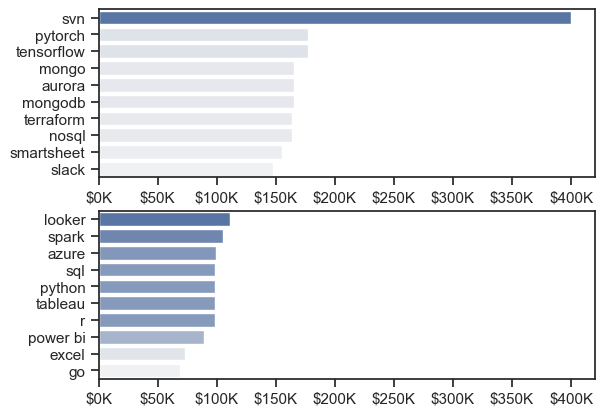

In [ ]:
# Plot salary distribution for each skill
fig,ax = plt.subplots(2,1)

sns.barplot(data=df_da_top_pay,
            x='median',
            y=df_da_top_pay.index, hue='median', 
            ax=ax[0],
            palette='light:b'
)

ax[0].set_title('Top 10 highest paid skills for Data Analyst')
ax[0].legend().remove()
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(lambda x, pos: f'${int(x/1000)}K')

sns.barplot(data=df_da_top_skill,
            x='median',
            y=df_da_top_skill.index, 
            hue='median', 
            ax=ax[1],
            palette='light:b'
)

ax[1].set_title('Top 10 most in-demand skills for Data Analyst')
ax[1].legend().remove()
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(lambda x, pos: f'${int(x/1000)}K')